## 선형회귀
 - 독립변수 : 독립적으로 변할 수 있는 x값
 - 종속변수 : 독립변수에 따라 종속적으로 변하는 값
 - 선형회귀 : 독립변수 x사용해 종속변수 y의 움직임을 예측하고 설명
 - 단순 선형 회귀( simple linear regression ) : y를 하나의 x값으로 설명
 - 다중 선형 회귀( multiple linear regression ) : y값 설명에 x값 여러개 필요할 때

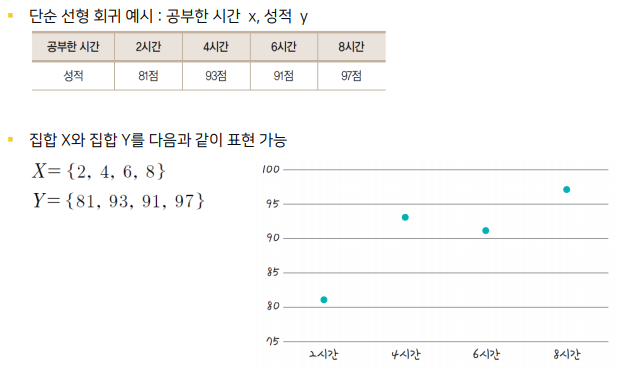

- 점들의 특징을 가장 잘나타내는 선을 그리는 것이 선형 회귀
- 선은 직선이므로 일차 함수 그래프 y = ax + b
- x값은 독립 변수이고 y값은 종속 변수
- 직선의 기울기 a값과 y절편 b값을 정확히 예측해 내야 함

- 최소 제곱법(method of least squares) : 일차 함수의 기울기 a와 y절편 b를 구할 수 있음 (다항 함수인 경우에는 경사하강법을 이용)
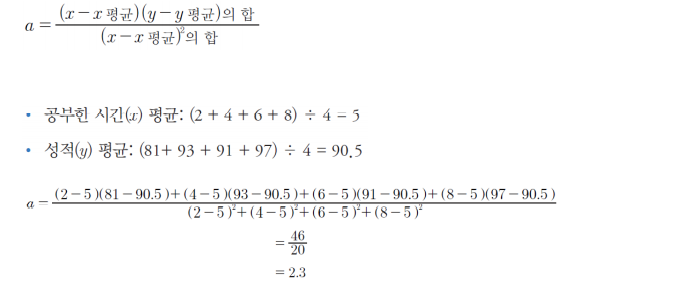

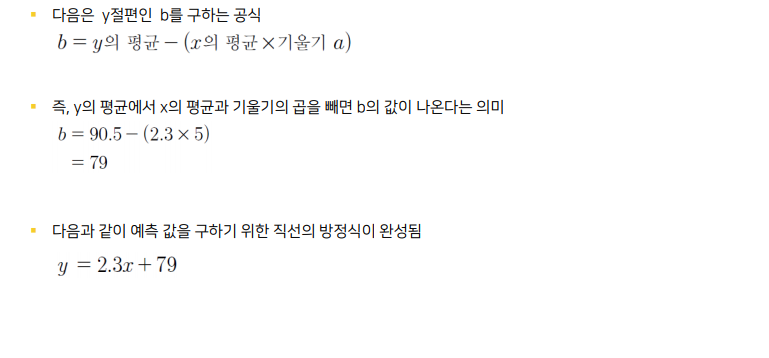
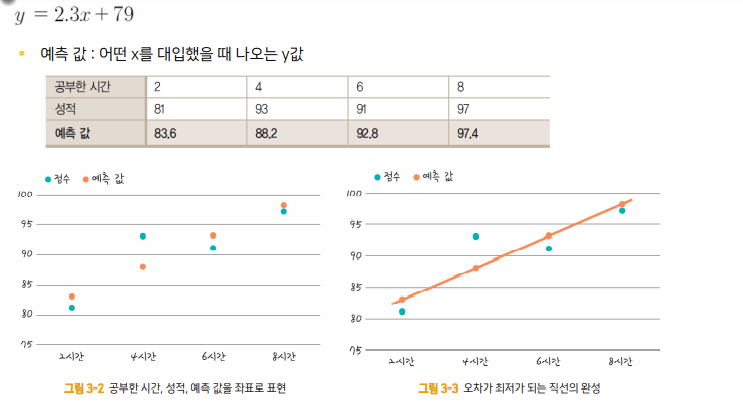

In [12]:
import numpy as np

x = [2, 4, 6, 8] # 독립
y = [81, 93, 91, 97] # 종속

mx = np.mean(x)
my = np.mean(y)

print("mean(x) : {}".format(mx))
print("mean(y) : {}".format(my))

# 기울기 공식의 분모 
# divisor = sum([(mx - xn)**2 for xn in x])
divisor = 0
for xn in x:
    divisor = divisor + (mx - xn)**2 

# 기울기 공식의 분자
def top(x, mx, y, my):
    div = 0
    
    for n in range(len(x)):
        div = div + ((x[n] - mx) * (y[n] - my))
    return div

dividend = top(x, mx, y, my)

print("분모 : ",divisor)
print("분자 : ",dividend)

# 기울기와 y
a = dividend / divisor
b = my - (a * mx)

print("기울기 a : ({} / {}) = {}".format(dividend, divisor, a))
print("y 절편 b : ({} - ({} * {})) = {}".format(my, a, mx, b))

mean(x) : 5.0
mean(y) : 90.5
분모 :  20.0
분자 :  46.0
기울기 a : (46.0 / 20.0) = 2.3
y 절편 b : (90.5 - (2.3 * 5.0)) = 79.0


**평균 제곱 오차(mean square error, MSE)**
- 최소 제곱법과 달리 여러 변수가 있을 때도 사용가능
- 여러 개의 입력 값을 계산할 때 임의의 선을 그리고 난 후, 이 선이 얼마나 잘 그려졌는지를 평가하여 조금씩 수정해 가는 방법
- 가설을 하나 세운 뒤, 이 값이 주어진 요건을 충족하는지 판단하여 조금씩 변화를 주고, 이 변화가 긍정적이면 오차가 최소가 될 때까지 이 과정을 계속 반복하는 방법

- 임의의 값을 대입한 뒤 오차를 구하고 이 오차를 최소화하는 방식을 사용해서 a와 b의 값을 구해 보자
- 대강 선을 그어보기 위해서 기울기 a와 y절편 b를 임의의 수 3과 76이라고 가정해 보자

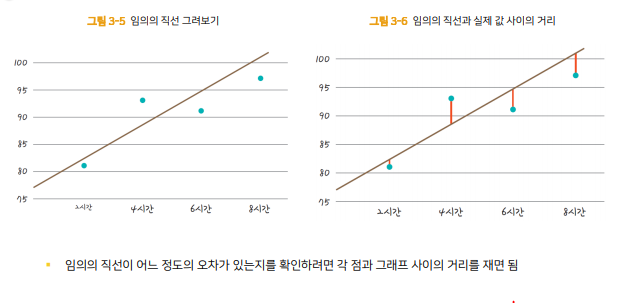

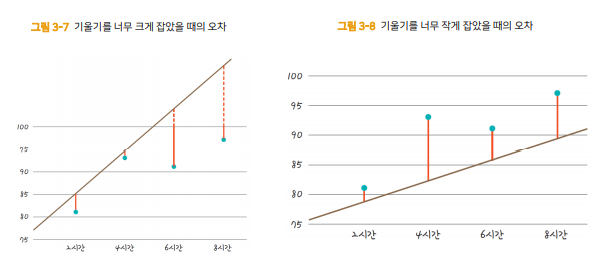

- 그래프의 기울기가 잘못 되었을 수록 오차의 합 커짐
- 기울기가 무한대로 커지면 오차도 무한대로 커지는 상관관계
- 거리 = y예측값 - y실제값
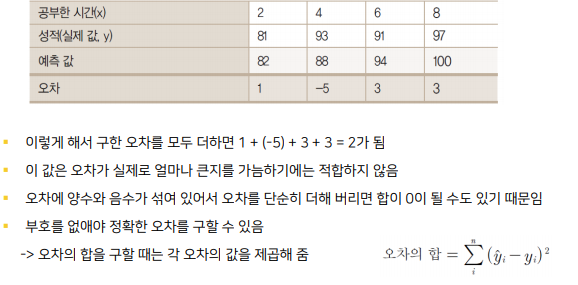

- **선형 회귀**
- 임의의 직선을 그어 이에 대한 평균 제곱 오차(mse)를 구하고, 이 값을 가장 작게 만들어 주는 a와 b 값을 찾아가는 작업
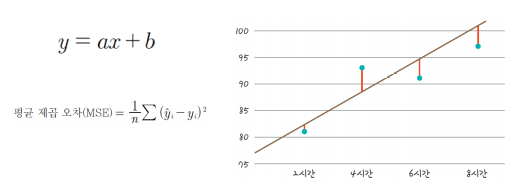

In [13]:
import numpy as np

fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

def predict(x):
    return fake_a_b[0]*x + fake_a_b[1] # y_hat = ax + b

def mse(y, y_hat):
    return ((y_hat - y) ** 2).mean()

def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

# 예측값
predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간 = %.f, 실제점수 = %.f, 예측점수 = %.f" % (x[i], y[i], predict(x[i])))

print("MSE 최종값: " + str(mse_val(predict_result, y)))

공부시간 = 2, 실제점수 = 81, 예측점수 = 82
공부시간 = 4, 실제점수 = 93, 예측점수 = 88
공부시간 = 6, 실제점수 = 91, 예측점수 = 94
공부시간 = 8, 실제점수 = 97, 예측점수 = 100
MSE 최종값: 11.0
